<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df[df['Country (region)'] == 'Russia'].head(1)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
67,Russia,68,64,96.0,9.0,40.0,107.0,127.0,101.0,45.0,89.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [5]:
len(df)

156

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


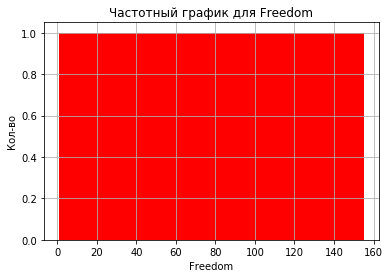

In [6]:
# 155 интервалов для 156 элементов
plt.hist(df['Freedom'], len(df)-1, facecolor = 'r')
plt.xlabel('Freedom')
plt.ylabel('Кол-во')
plt.title('Частотный график для Freedom')
plt.grid(True)
plt.show()

# Видно, что каждый элемент Freedom встречается ровно 1 раз. Распределение Freedom - равномерное

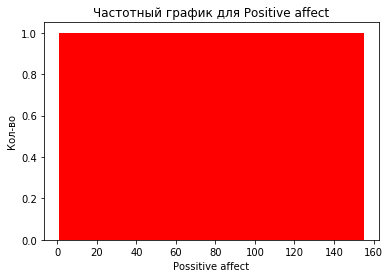

In [7]:
# 155 интервалов для 156 элементов
plt.hist(df['Positive affect'], len(df)-1, facecolor = 'r')
plt.xlabel('Possitive affect')
plt.ylabel('Кол-во')
plt.title('Частотный график для Positive affect')
plt.show()

# Видно, что каждый элемент Freedom встречается ровно 1 раз. Распределение Freedom - равномерное<span style="color:red">**Равномерное распределение** </span><br>

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
#import statistics

#Уберем nan (выбросы)
df1 = df.loc[df['Freedom'].isna() == False]

# Фильтруем выбросы по межквантильному расстоянию
q2 = df1['Freedom'].median()
q1 = df1['Freedom'].quantile(0.25)
q3 = df1['Freedom'].quantile(0.75)
iqr = q3 - q1
# Границы выбросов (outliers)
outliermin = max(q1 - 1.5*iqr, 0)
outliermax = q3 + 1.5*iqr
df1 = df1[(df1['Freedom'] <= outliermax) & (df1['Freedom'] >= outliermin)]

print('Медиана :', q2)
#statistics.mode(df['Freedom'])   -- мода - любое число из выборки
print('Мат. ожидание :', statistics.mean(df1['Freedom']))
print('Стандартное отклонение :', statistics.pstdev(df1['Freedom']))
print('Дисперсия :', statistics.pvariance(df1['Freedom']))
print('Максимум :', max(df1['Freedom']))
print('Минимум :', min(df1['Freedom']))
print('Размах :', max(df1['Freedom']) - min(df1['Freedom']))

#Выбросы:
df2 = df.loc[(df['Freedom'].isna() == True) | (df['Freedom'] < outliermin) |  (df['Freedom'] > outliermax)]
print('Выбросы :',[x for x in df2['Freedom'].values])

Медиана : 78.0
Мат. ожидание : 78.0
Стандартное отклонение : 44.74371464239419
Дисперсия : 2002.0
Максимум : 155.0
Минимум : 1.0
Размах : 154.0
Выбросы : [nan]


Почему нельзя найти моду?

**Распределение равномерное => все значения встречаются ровно один раз. Мода - любое число из выборки**

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

 Rxy = 0.68  p_value = 0.00


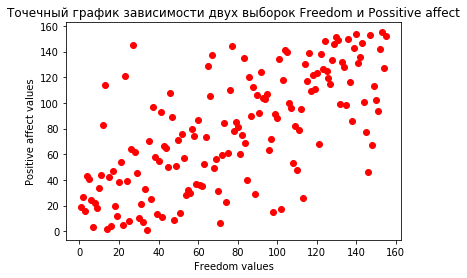

In [9]:
from scipy.stats import pearsonr
x = df1['Freedom']
y = df1['Positive affect']

corr , p_value = pearsonr(x, y)
print(f' Rxy = {corr:.2f}  p_value = {p_value:.2f}')
# Знак коэффициент показывает связь x и y: 
# + прямопорциональная, - обратнопропорциональная
# p_value - вероятность того, что такие данные могут быть получены при полном отсутствии связи между величинами

plt.xlabel('Freedom values')
plt.ylabel('Positive affect values')
plt.title('Точечный график зависимости двух выборок Freedom и Possitive affect')
plt.scatter(x,y, c = 'Red')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# fit_transform - Вычитаем среднее и делим на стандартое отклонение (z масштабирование)
np_scaled = min_max_scaler.fit_transform(df1[['Freedom', 'Positive affect']])

# кладем 2 полученных столбца в фрейм
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1
0,0.025974,0.259740
1,0.032468,0.149351
2,0.012987,0.097403
3,0.038961,0.012987
4,0.116883,0.071429


Построить матрицу корреляций для всех колонок таблицы

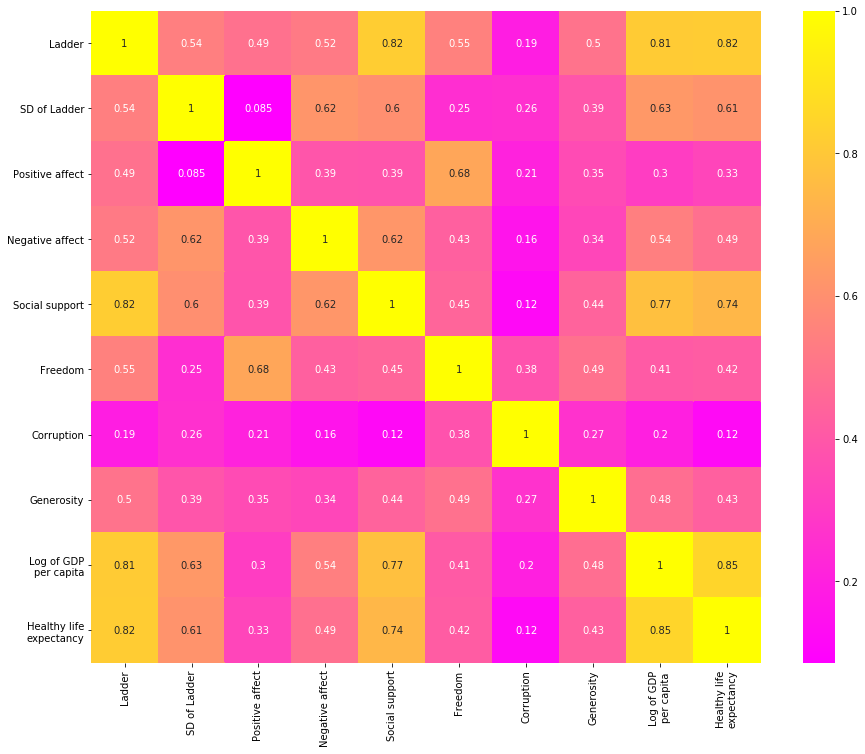

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='spring')
plt.gcf().set_size_inches(15,12)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

**Диагональные единицы - это корреляция выборки сама с собой. Где r > 0,8 - выглядит логично, например, ВВП на душу населения коррелирует с продолжительностью жизни (r = 0.85)**

Загрузить таблицу цен на авокадо: 

In [12]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df2=pd.read_csv(url)
df2[:3]
df2.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Сделать частотный график колонки AveragePrice. Какое это распределение?

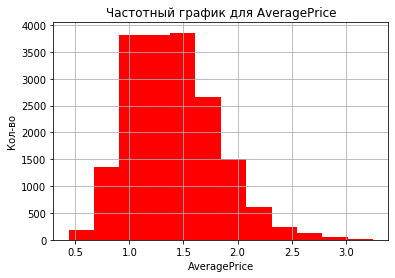

In [13]:
plt.hist(df2['AveragePrice'], 12, facecolor = 'r')
plt.xlabel('AveragePrice')
plt.ylabel('Кол-во')
plt.title('Частотный график для AveragePrice')
plt.grid(True)
plt.show()

# Нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

 Rx1y = -0.21
 Rx2y = -0.17
 Rx3y = -0.18


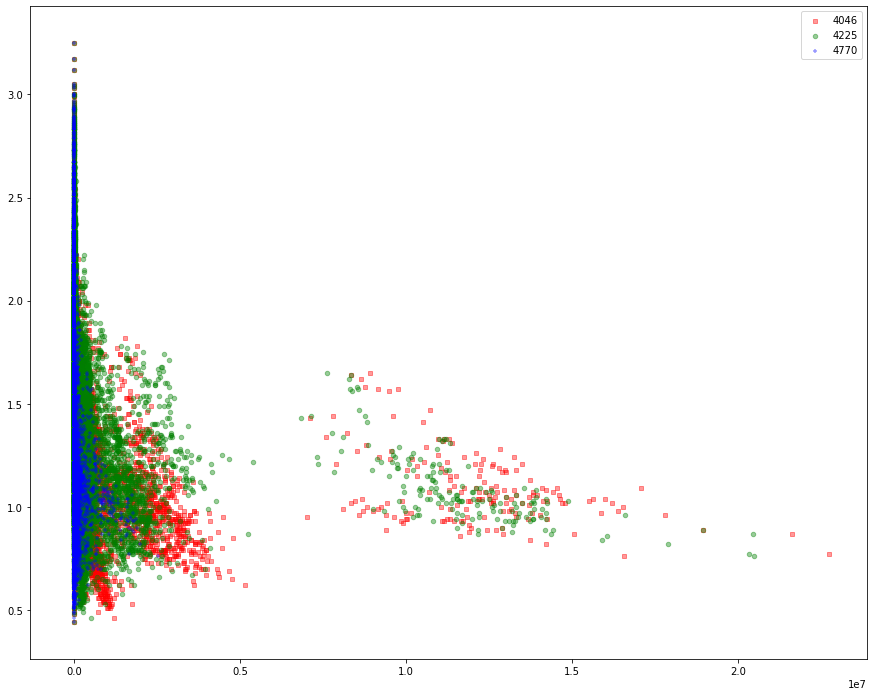

In [14]:
#from scipy.stats import pearsonr
x1 = df2['4046']
x2 = df2['4225']
x3 = df2['4770']
y = df2['AveragePrice']

corr1 , p_value1 = pearsonr(x1, y)
print(f' Rx1y = {corr1:.2f}')
corr2 , p_value2 = pearsonr(x2, y)
print(f' Rx2y = {corr2:.2f}')
corr3 , p_value3 = pearsonr(x3, y)
print(f' Rx3y = {corr3:.2f}')


x1 = df2['4046']
x2 = df2['4225']
x3 = df2['4770']
y = df2['AveragePrice']

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y, s= 20, alpha = 0.4, c='r', marker="s", label='4046')
ax1.scatter(x2,y, s= 20, alpha = 0.4, c='g', marker="o", label='4225')
ax1.scatter(x3,y, s= 20, alpha = 0.4, c='b', marker="+", label='4770')

plt.legend(loc='upper right')

plt.gcf().set_size_inches(15,12)
plt.show()

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [15]:
def set_int_date(row):
    return row['ds'].replace('-','')   
    

In [16]:
# Выбираем органический авакадо из Лас Вегаса
df_organic_lv = df2[(df2['type'] == 'organic') & (df2['region'] == 'LasVegas')][['Date','AveragePrice']].reset_index(drop = True)
date_price_organic_lv1 = df_organic_lv.rename(columns={'Date':'ds', 'AveragePrice':'y'})

# Добавим дату как int и отсортируем
date_price_organic_lv1['dateint'] = date_price_organic_lv1.apply(set_int_date, axis = 1)
date_price_organic_lv1['dateint'] = date_price_organic_lv1['dateint'].astype(int)
date_price_organic_lv1 = date_price_organic_lv1.sort_values(by = 'dateint').reset_index(drop = True)

# Позицию первых июльских данных за 2017
pos = len(date_price_organic_lv1[date_price_organic_lv1['dateint'] < 20170701])

date_price_organic_lv2 = date_price_organic_lv1[['ds','y']]
train_price = date_price_organic_lv2[date_price_organic_lv2.index < pos]
test_price = date_price_organic_lv2[date_price_organic_lv2.index >= pos]

In [17]:
# обучим модель
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
import datetime
str_end_date = str(date_price_organic_lv1.loc[len(date_price_organic_lv1) - 1]['dateint'])
end_year = int(str_end_date[0:4])
if str_end_date[3] == '0': 
    end_month = int(str_end_date[5])
else:
    end_month = int(str_end_date[4:6])
if str_end_date[5] == '0': 
    end_day = int(str_end_date[7])
else:
    end_day = int(str_end_date[6:8])
start_date = datetime.date(2017,7,1)
end_date = datetime.date(end_year,end_month,end_day)

#рассчитаем кол-во дней прогноза
forecast_period = end_date - start_date 
future = m.make_future_dataframe(periods=forecast_period.days)
forecast = m.predict(future)

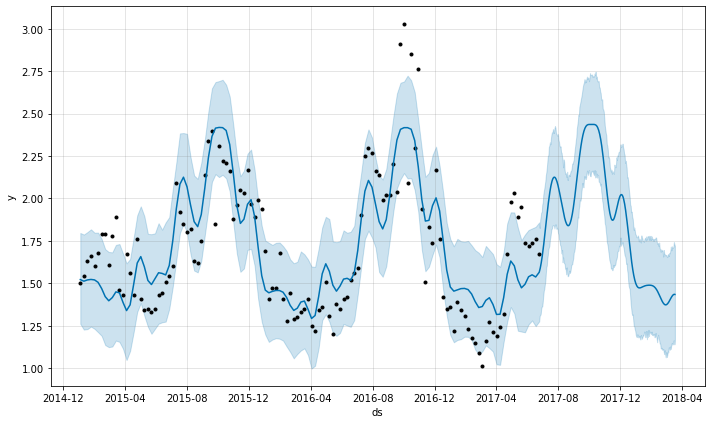

In [19]:
#прогноз
fig1 = m.plot(forecast)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



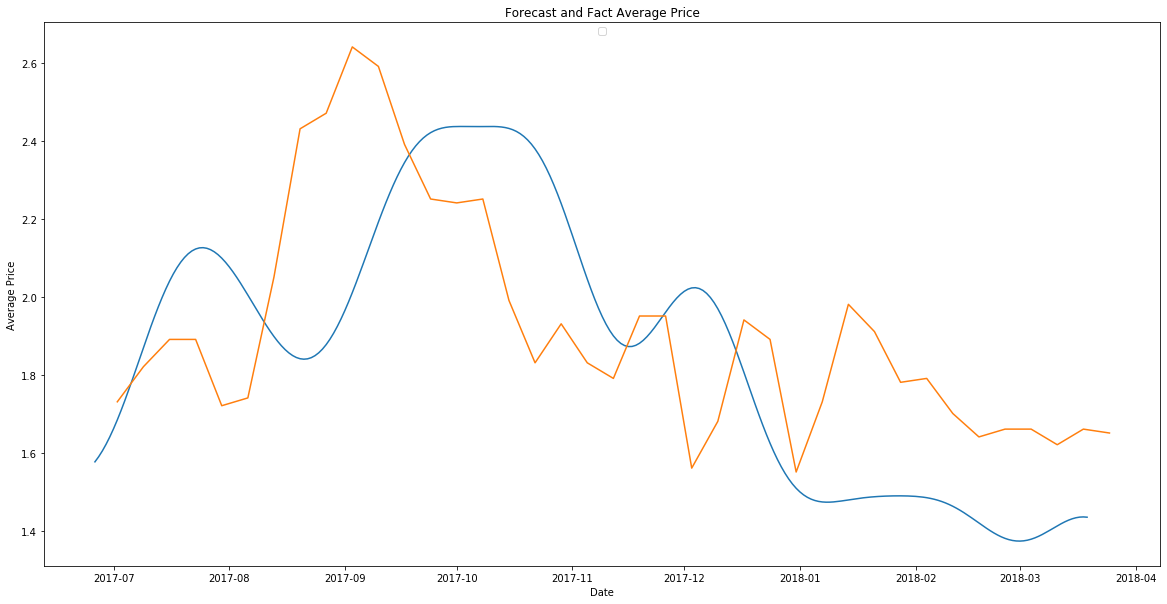

In [20]:
#сравнение

forecast_future = forecast.iloc[pos:,:]
forecast_future['ds'] = forecast_future['ds'].astype('datetime64[ns]')

test_price['ds'] = test_price['ds'].astype('datetime64[ns]')

plt.figure(figsize=(20,10))
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(loc='upper center')
plt.title('Forecast and Fact Average Price')

plt.show()